In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Q2
## Comparing Bayes, logistic, and KNN classifiers
In lectures, we learn three different classifiers. This question is to implement and compare them.
Python users, please feel free to use Scikit-learn, which is a commonly-used and powerful Python library
with various machine learning tools. But you can also use other similar libraries in other languages of
your choice to perform the tasks.
Part One (Divorce classification/prediction). (30 points)
This dataset is about participants who completed the personal information form and a divorce predic-
tors scale.
The data is a modified version of the publicly available at
https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so
you will not get the exactly same results as on UCI website). The dataset marriage.csv is contained
in the homework folder. There are 170 participants and 54 attributes (or predictor variables) that are
all real-valued. The last column of the CSV file is label y (1 means “divorce”, 0 means “no divorce”).
Each column is for one feature (predictor variable), and each row is a sample (participant). A detailed
1explanation for each feature (predictor variable) can be found at the website link above. Our goal is
to build a classifier using training data, such that given a test sample, we can classify (or essentially
predict) whether its label is 0 (“no divorce”) or 1 (“divorce”).
Build three classifiers using (Naive Bayes, Logistic Regression, KNN). Use the first 80% data for
training and the remaining 20% for testing. If you use scikit-learn you can use train test split to split
the dataset.
Remark: Please note that, here, for Naive Bayes, this means that we have to estimate the variance for
each individual feature from training data. When estimating the variance, if the variance is zero to
close to zero (meaning that there is very little variability in the feature), you can set the variance to
be a small number, e.g., $\epsilon = 10^{−3}$. We do not want to have include zero or nearly variance in Naive
Bayes. This tip holds for both Part One and Part Two of this question.

In [3]:
#load data and inspect
data = pd.read_csv('marriage.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


In [4]:
#Separate independent and dependent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

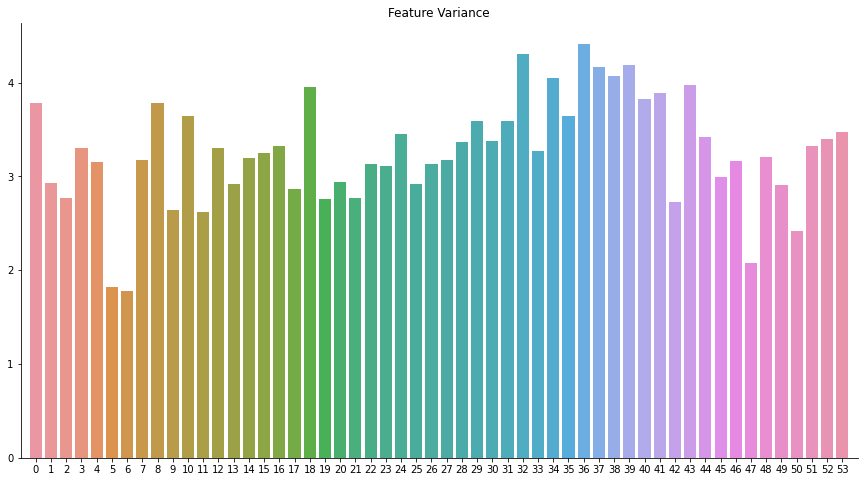

In [6]:
plt.figure(figsize=(15,8))
plt.title('Feature Variance')
sns.barplot(list(range(54)),np.var(X_train))
sns.despine(top=True, right=True)
plt.xlim([-1,54])
plt.show()

### Logistic Regression

In [7]:
#CV search across various vals of hyperparameter C
Cs = np.linspace(0.0001, 10, 100)

#fit LRCV 
clf = LogisticRegressionCV(Cs=Cs, n_jobs=4, random_state=42, verbose=False, penalty='l2')
clf.fit(X_train, y_train)

#extract the best C_ from the fitted CV model
best_C = clf.C_[0]

#build LR model using best C_
clf_lr = LogisticRegression(C=best_C, random_state=42, penalty='l2')
clf_lr.fit(X_train, y_train)

#predict on train and test set
pred_train_lr = clf_lr.predict(X_train)
pred_test_lr = clf_lr.predict(X_test)

#train / test acc score
lr_acc_train = accuracy_score(y_train, pred_train_lr)
lr_acc_test = accuracy_score(y_test, pred_test_lr)

#confusion matrix on test set 
lr_confusion = confusion_matrix(y_test, pred_test_lr)

#precision recall f1
lr_metrics = precision_recall_fscore_support(y_test, pred_test_lr)

### KNN

In [8]:
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_train, y_train)

#predict on train and test set
pred_train_knn = clf_knn.predict(X_train)
pred_test_knn = clf_knn.predict(X_test)

#train / test acc score
knn_acc_train = accuracy_score(y_train, pred_train_knn)
knn_acc_test = accuracy_score(y_test, pred_test_knn)

#confusion matrix on test set 
knn_confusion = confusion_matrix(y_test, pred_test_knn)

#precision recall f1
knn_metrics = precision_recall_fscore_support(y_test, pred_test_knn)

### Naive Bayes

In [9]:
clf_nb = GaussianNB(var_smoothing=1e-3)
clf_nb.fit(X_train, y_train)

#predict on train and test set
pred_train_nb = clf_nb.predict(X_train)
pred_test_nb = clf_nb.predict(X_test)

#train / test acc score
nb_acc_train = accuracy_score(y_train, pred_train_nb)
nb_acc_test = accuracy_score(y_test, pred_test_nb)

#confusion matrix on test set 
nb_confusion = confusion_matrix(y_test, pred_test_nb)

#precision recall f1
nb_metrics = precision_recall_fscore_support(y_test, pred_test_nb)

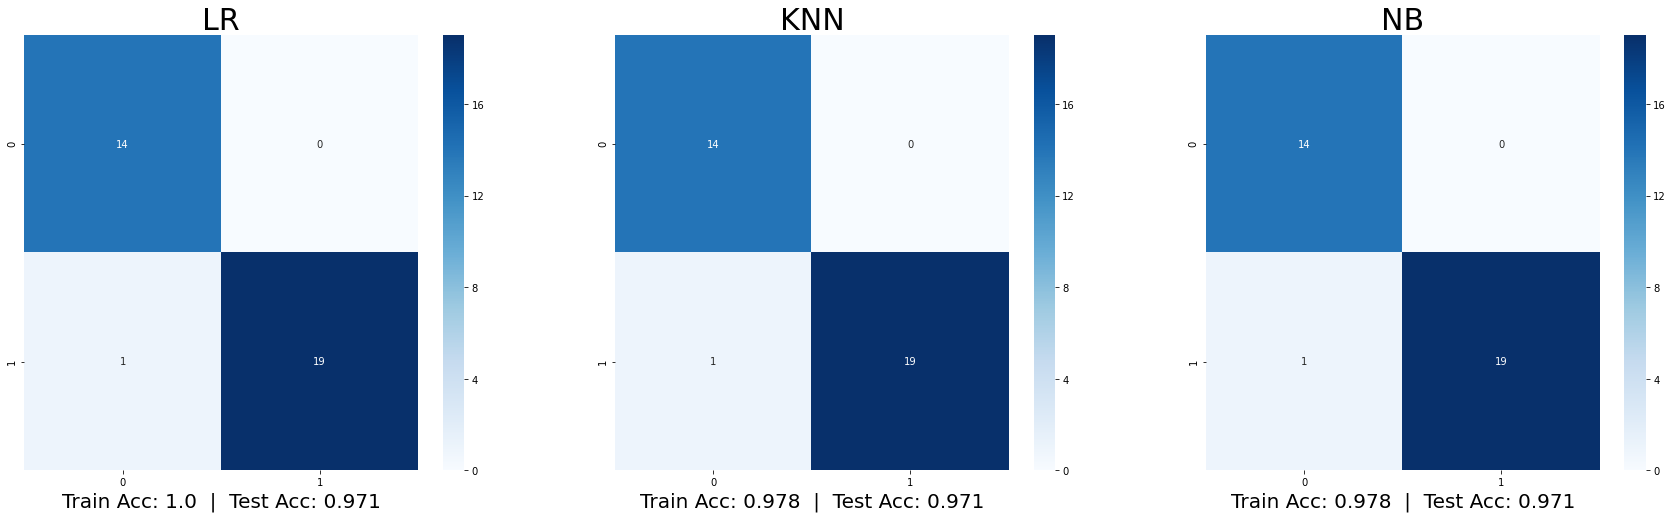

In [10]:
plt.subplots(nrows=1, ncols=3, figsize=(30,8))
plt.subplot(131)
sns.heatmap(lr_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(lr_acc_train,3), round(lr_acc_test,3)), fontsize=20)
plt.title('LR',fontsize=30)

plt.subplot(132)
sns.heatmap(knn_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(knn_acc_train,3), round(knn_acc_test,3)), fontsize=20)
plt.title('KNN', fontsize=30)

plt.subplot(133)
sns.heatmap(nb_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(nb_acc_train,3), round(nb_acc_test,3)), fontsize=20)
plt.title('NB',fontsize=30)
plt.savefig('p1_acc.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

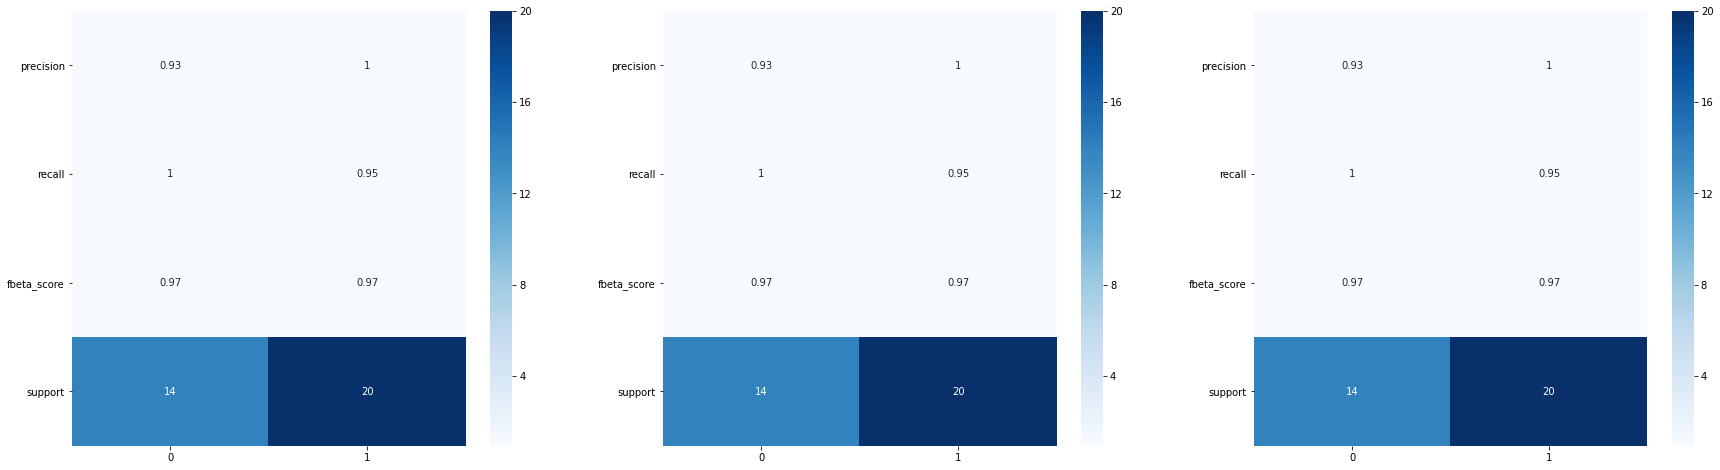

In [10]:
plt.subplots(nrows=1, ncols=3, figsize=(30,8))
plt.subplot(131)
sns.heatmap(lr_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)

plt.subplot(132)
sns.heatmap(knn_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)

plt.subplot(133)
sns.heatmap(nb_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)
plt.show()

b.) Now perform PCA to project the data into two-dimensional space. Plot the data
points and decision boundary of each classifier. Comment on the difference between the decision
boundary for the three classifiers. Please clearly represent the data points with different labels
using different colors.

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
#LR
#---------------------------------
Cs = np.linspace(0.0001, 10, 100)

#fit LRCV 
clf = LogisticRegressionCV(Cs=Cs, n_jobs=4, random_state=42, verbose=False, penalty='l2')
clf.fit(X_train_pca, y_train)

#extract the best C_ from the fitted CV model
best_C = clf.C_[0]

#build LR model using best C_
clf_lr = LogisticRegression(C=best_C, random_state=42, penalty='l2')
clf_lr.fit(X_train_pca, y_train)


#KNN
#-----------------------------------
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_train_pca, y_train)


#NB
#--------------------------------------
clf_nb = GaussianNB(var_smoothing=1e-3)
clf_nb.fit(X_train_pca, y_train)

GaussianNB(var_smoothing=0.001)

In [14]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))


Z_lr = clf_lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_knn = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_nb = clf_nb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [15]:
def decision_boundary(Z, X, y, title):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)



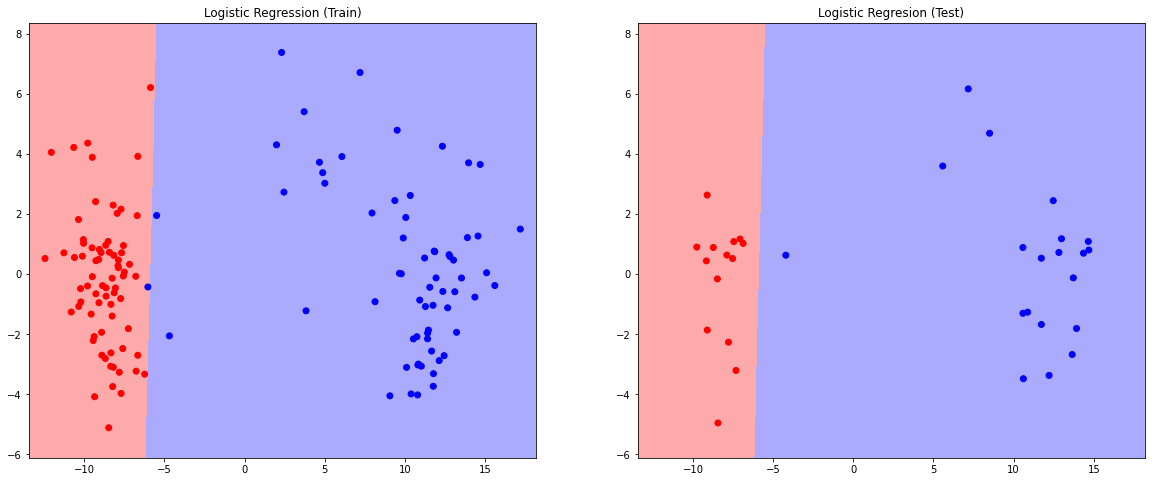

In [16]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_lr, X_train_pca, y_train, 'Logistic Regression (Train)')
plt.subplot(122)
decision_boundary(Z_lr, X_test_pca, y_test, 'Logistic Regresion (Test)' )
plt.show()

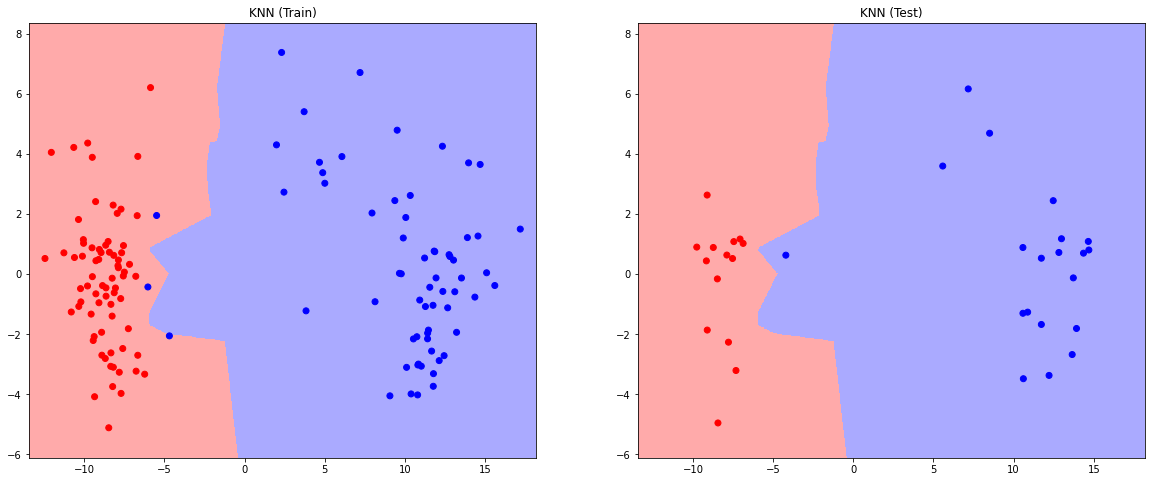

In [17]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_knn, X_train_pca, y_train, 'KNN (Train)')
plt.subplot(122)
decision_boundary(Z_knn, X_test_pca, y_test, 'KNN (Test)' )
plt.show()

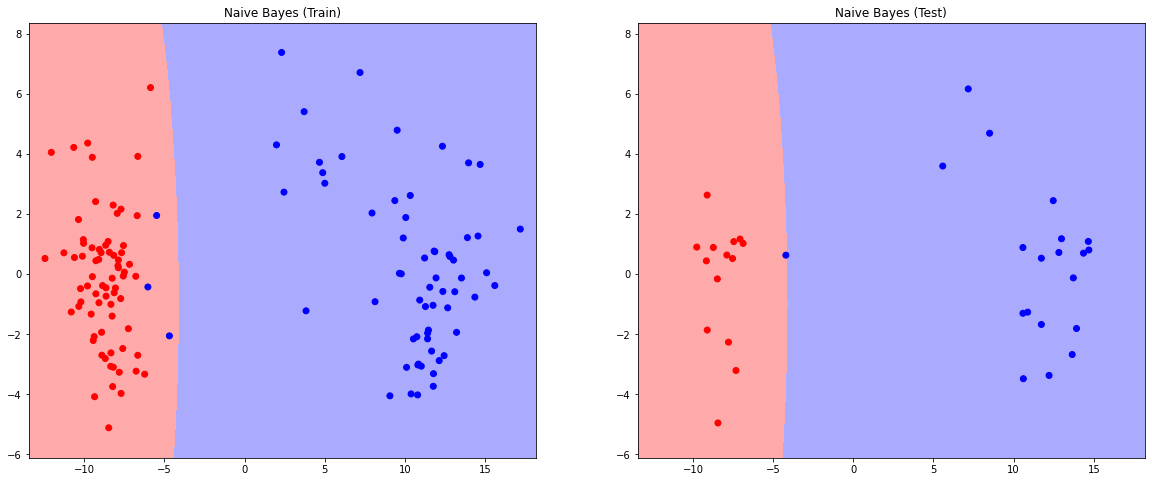

In [18]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_nb, X_train_pca, y_train, 'Naive Bayes (Train)')
plt.subplot(122)
decision_boundary(Z_nb, X_test_pca, y_test, 'Naive Bayes (Test)' )
plt.show()

Part Two (Handwritten digits classification). (30 points) Repeat the above using the MNIST
Data in our previous homework. Here, give “digit” 6 label y = 1, and give “digit” 2 label y = 0. All
the pixels in each image will be the feature (predictor variables) for that sample (i.e., image). Our goal
is to build classifier to such that given a new test sample, we can tell is it a 2 or a 6. Using the first
80% of the samples for training and remaining 20% for testing.
(a) (15 points) Report testing accuracy for each of the three classifiers. Comment on their perfor-
mance: which performs the best and make a guess why they perform the best in this setting.
(b) (15 points) Now perform PCA to project the data into two-dimensional space. Plot the data
points and decision boundary of each classifier. Comment on the difference between the decision
boundary for the three classifiers. Please clearly represent the data points with different labels
using different colors.

In [19]:
numbers = loadmat('data.mat')['data'].T
labels = loadmat('label.mat')['trueLabel'][0]

data = list(zip(numbers,labels))
np.random.shuffle(data)

numbers = np.array([x[0] for x in data])
labels = np.array([x[1] for x in data])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(numbers, labels, test_size=0.2, random_state=42)

In [21]:
#CV search across various vals of hyperparameter C
Cs = np.linspace(0.0001, 10, 100)

#fit LRCV 
clf = LogisticRegressionCV(Cs=Cs, n_jobs=4, random_state=42, verbose=False, penalty='l2')
clf.fit(X_train, y_train)

#extract the best C_ from the fitted CV model
best_C = clf.C_[0]

#build LR model using best C_
clf_lr = LogisticRegression(C=best_C, random_state=42, penalty='l2')
clf_lr.fit(X_train, y_train)

#predict on train and test set
pred_train_lr = clf_lr.predict(X_train)
pred_test_lr = clf_lr.predict(X_test)

#train / test acc score
lr_acc_train = accuracy_score(y_train, pred_train_lr)
lr_acc_test = accuracy_score(y_test, pred_test_lr)

#confusion matrix on test set 
lr_confusion = confusion_matrix(y_test, pred_test_lr)

#precision recall f1
lr_metrics = precision_recall_fscore_support(y_test, pred_test_lr)

In [22]:
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_train, y_train)

#predict on train and test set
pred_train_knn = clf_knn.predict(X_train)
pred_test_knn = clf_knn.predict(X_test)

#train / test acc score
knn_acc_train = accuracy_score(y_train, pred_train_knn)
knn_acc_test = accuracy_score(y_test, pred_test_knn)

#confusion matrix on test set 
knn_confusion = confusion_matrix(y_test, pred_test_knn)

#precision recall f1
knn_metrics = precision_recall_fscore_support(y_test, pred_test_knn)

In [23]:
clf_nb = GaussianNB(var_smoothing=1e-3)
clf_nb.fit(X_train, y_train)

#predict on train and test set
pred_train_nb = clf_nb.predict(X_train)
pred_test_nb = clf_nb.predict(X_test)

#train / test acc score
nb_acc_train = accuracy_score(y_train, pred_train_nb)
nb_acc_test = accuracy_score(y_test, pred_test_nb)

#confusion matrix on test set 
nb_confusion = confusion_matrix(y_test, pred_test_nb)

#precision recall f1
nb_metrics = precision_recall_fscore_support(y_test, pred_test_nb)

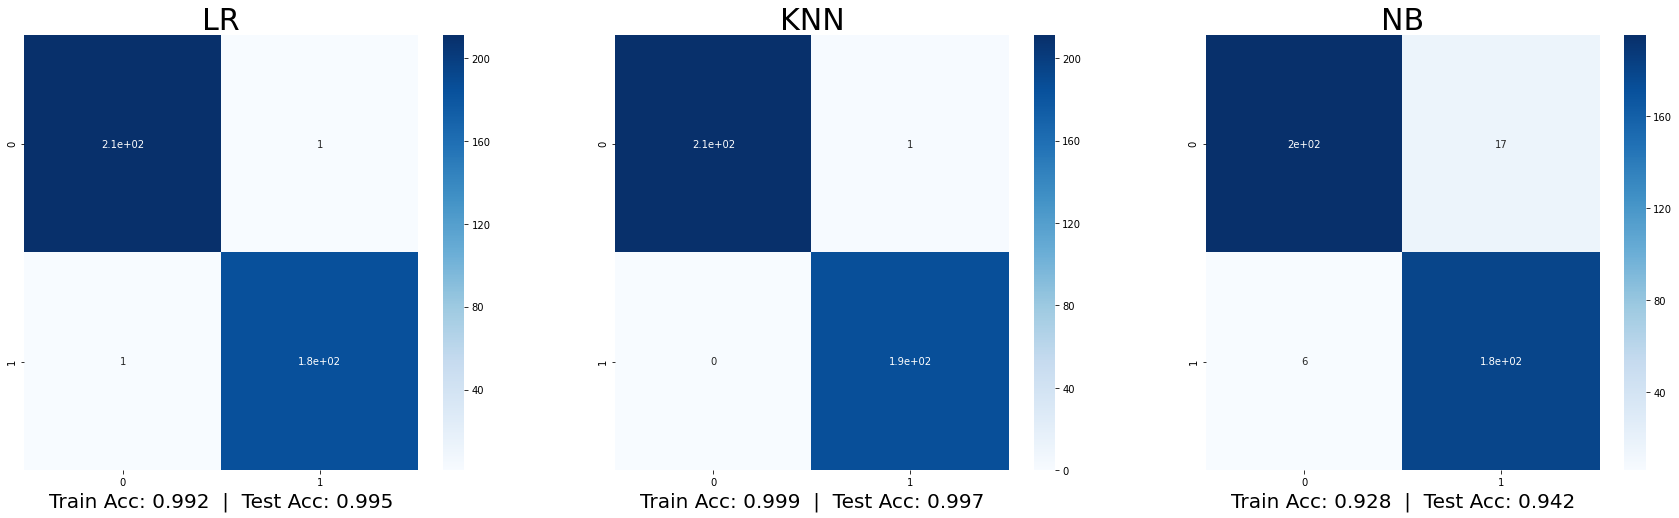

In [24]:
plt.subplots(nrows=1, ncols=3, figsize=(30,8))
plt.subplot(131)
sns.heatmap(lr_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(lr_acc_train,3), round(lr_acc_test,3)), fontsize=20)
plt.title('LR',fontsize=30)

plt.subplot(132)
sns.heatmap(knn_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(knn_acc_train,3), round(knn_acc_test,3)), fontsize=20)
plt.title('KNN', fontsize=30)

plt.subplot(133)
sns.heatmap(nb_confusion, cmap='Blues', annot=True)
plt.xlabel('Train Acc: {}  |  Test Acc: {}'.format(round(nb_acc_train,3), round(nb_acc_test,3)), fontsize=20)
plt.title('NB',fontsize=30)
plt.show()

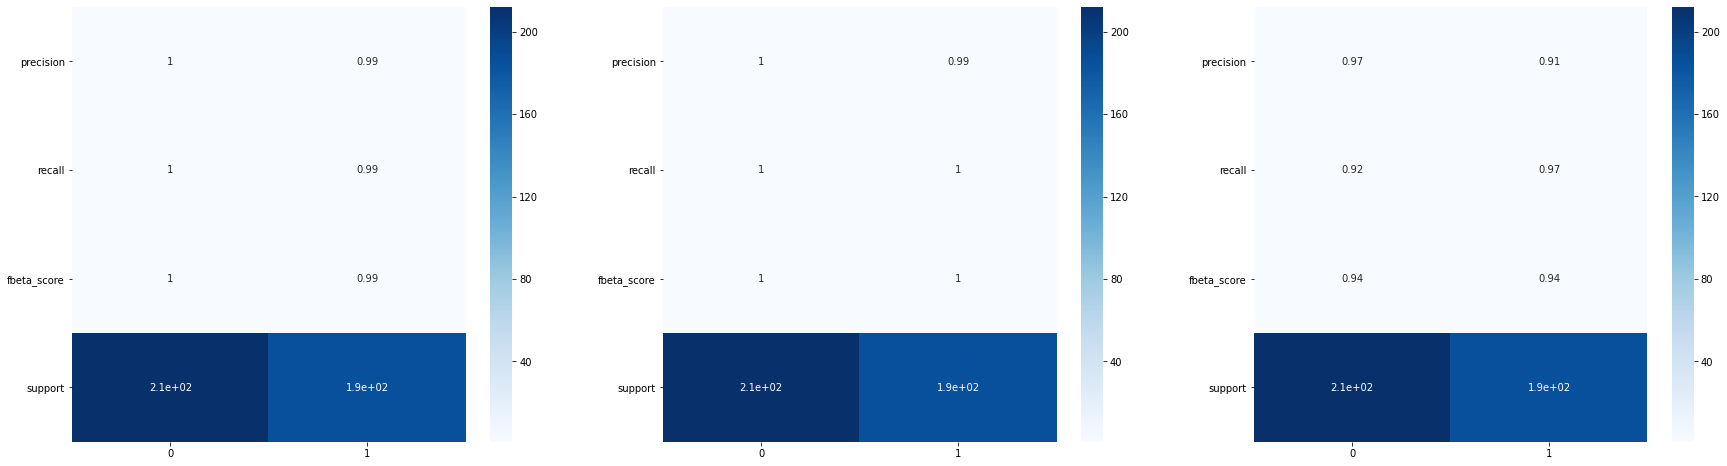

In [25]:
plt.subplots(nrows=1, ncols=3, figsize=(30,8))
plt.subplot(131)
sns.heatmap(lr_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)

plt.subplot(132)
sns.heatmap(knn_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)

plt.subplot(133)
sns.heatmap(nb_metrics, cmap='Blues', annot=True)
plt.yticks(np.arange(4) + 0.5,['precision', 'recall', 'fbeta_score', 'support'], rotation=0)
plt.show()

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [27]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
#LR
#---------------------------------
Cs = np.linspace(0.0001, 10, 100)

#fit LRCV 
clf = LogisticRegressionCV(Cs=Cs, n_jobs=4, random_state=42, verbose=False, penalty='l2')
clf.fit(X_train_pca, y_train)

#extract the best C_ from the fitted CV model
best_C = clf.C_[0]

#build LR model using best C_
clf_lr = LogisticRegression(C=best_C, random_state=42, penalty='l2')
clf_lr.fit(X_train_pca, y_train)


#KNN
#-----------------------------------
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_train_pca, y_train)


#NB
#--------------------------------------
clf_nb = GaussianNB(var_smoothing=1e-3)
clf_nb.fit(X_train_pca, y_train)

GaussianNB(var_smoothing=0.001)

In [29]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))


Z_lr = clf_lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_knn = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_nb = clf_nb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

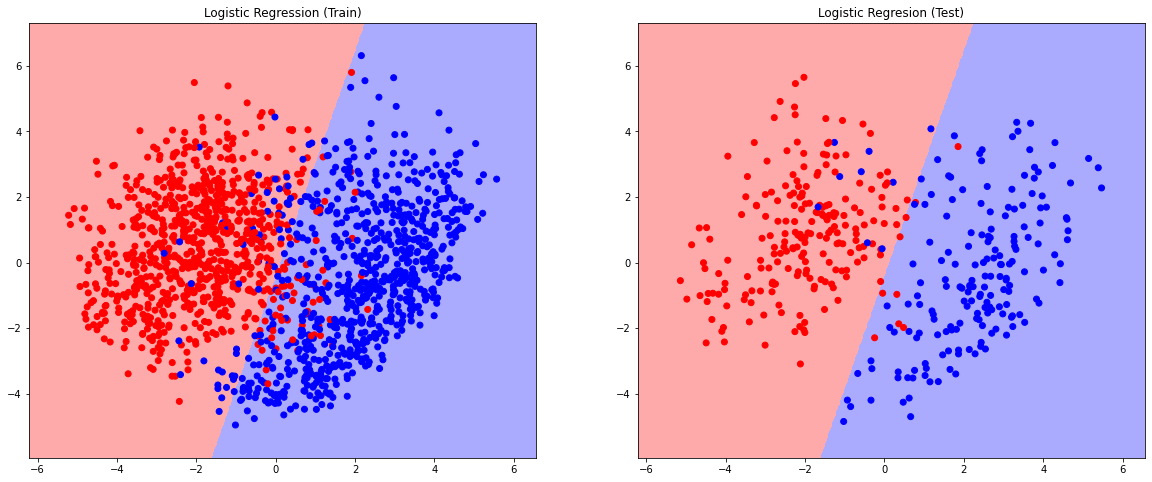

In [30]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_lr, X_train_pca, y_train, 'Logistic Regression (Train)')
plt.subplot(122)
decision_boundary(Z_lr, X_test_pca, y_test, 'Logistic Regresion (Test)' )
plt.show()

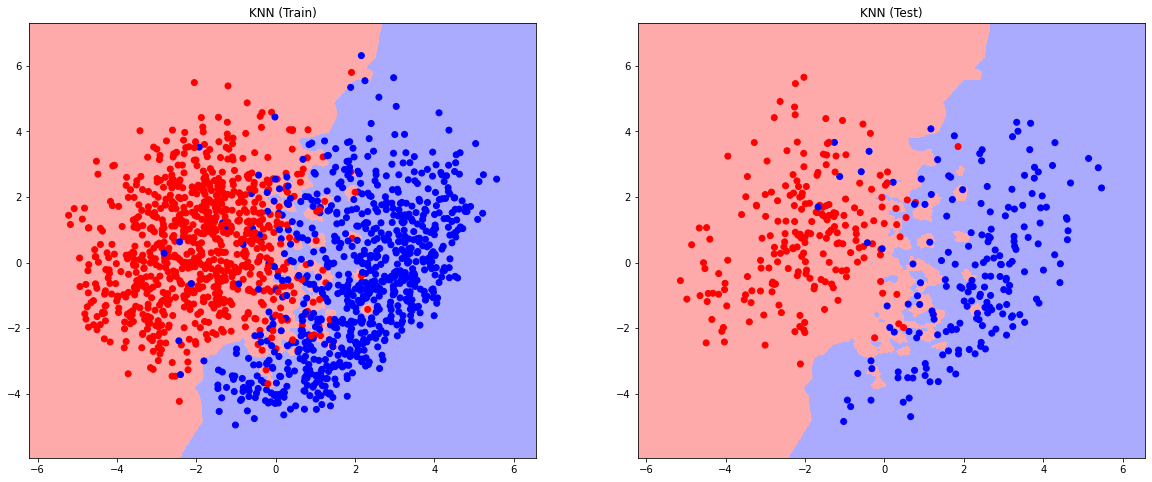

In [31]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_knn, X_train_pca, y_train, 'KNN (Train)')
plt.subplot(122)
decision_boundary(Z_knn, X_test_pca, y_test, 'KNN (Test)' )
plt.show()

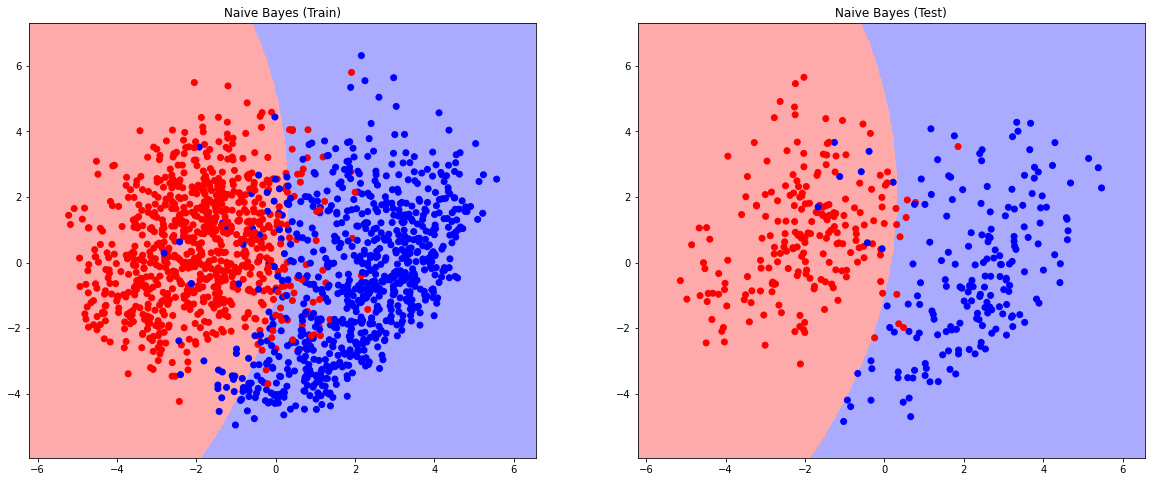

In [32]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
decision_boundary(Z_nb, X_train_pca, y_train, 'Naive Bayes (Train)')
plt.subplot(122)
decision_boundary(Z_nb, X_test_pca, y_test, 'Naive Bayes (Test)' )
plt.show()